In [1]:
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [3]:
filepath = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(filepath, header=0)

In [4]:
print("The first 5 rows od the dataframe")
df.head(5)

The first 5 rows od the dataframe


,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [5]:
"""Task 1 : Single Linear Regression
You have learnt that "CPU_frequency" is the parameter with the lowest p-value among the 
different features of the dataset. Create a single feature Linear Regression model that 
fits the pair of "CPU_frequency" and "Price" to find the model for prediction."""

'Task 1 : Single Linear Regression\nYou have learnt that "CPU_frequency" is the parameter with the lowest p-value among the \ndifferent features of the dataset. Create a single feature Linear Regression model that \nfits the pair of "CPU_frequency" and "Price" to find the model for prediction.'

In [6]:
lm = LinearRegression()
X = df[['CPU_frequency']]
Y = df[['Price']]
lm.fit(X,Y)

Yhat = lm.predict(X)

In [7]:
"""Generate the Distribution plot for the predicted values and that of the actual values. 
How well did the model perform?"""

'Generate the Distribution plot for the predicted values and that of the actual values. \nHow well did the model perform?'

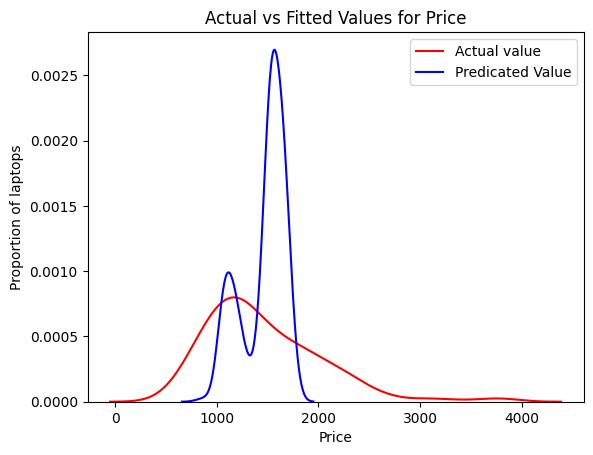

In [8]:
ax1 = sns.distplot(df['Price'], hist=False, color='r', label='Actual Value')

sns.distplot(Yhat, hist=False, color = 'b', label = 'Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')
plt.legend(['Actual value', 'Predicated Value'])
plt.show()

In [9]:
"""Evaluate the Mean Squared Error and R^2 score values for the model."""

'Evaluate the Mean Squared Error and R^2 score values for the model.'

In [10]:
mse_slr = mean_squared_error(df['Price'], Yhat)
r2_score_slr = lm.score(X, Y)
print('R2: ', r2_score_slr)
print('MSE: ', mse_slr)

R2:  0.1344436321024326
MSE:  284583.4405868629


In [11]:
"""Task 2 - Multiple Linear Regression¶
The parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are
'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. 
Use all these variables to create a Multiple Linear Regression system."""

"Task 2 - Multiple Linear Regression¶\nThe parameters which have a low enough p-value so as to indicate strong relationship with the 'Price' value are\n'CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core', 'OS', 'GPU' and 'Category'. \nUse all these variables to create a Multiple Linear Regression system."

In [12]:
lm1 = LinearRegression()
Z = df[['CPU_frequency','RAM_GB','Storage_GB_SSD','CPU_core','OS','GPU','Category']]
lm1.fit(Z, Y)
Y_hat = lm1.predict(Z)

In [13]:
"""Plot the Distribution graph of the predicted values as well as the Actual values"""

'Plot the Distribution graph of the predicted values as well as the Actual values'

Text(0, 0.5, 'Proportion of laptops')

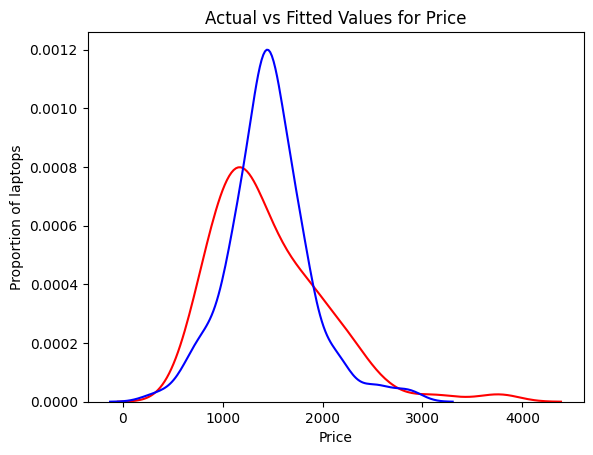

In [14]:
ax1 = sns.distplot(df['Price'], hist=False, color='r', label='Actual Value')
sns.distplot(Y_hat, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [15]:
"""Find the R^2 score and the MSE value for this fit. 
Is this better or worst than the performance of Single Linear Regression?"""

'Find the R^2 score and the MSE value for this fit. \nIs this better or worst than the performance of Single Linear Regression?'

Text(0, 0.5, 'Proportion of laptops')

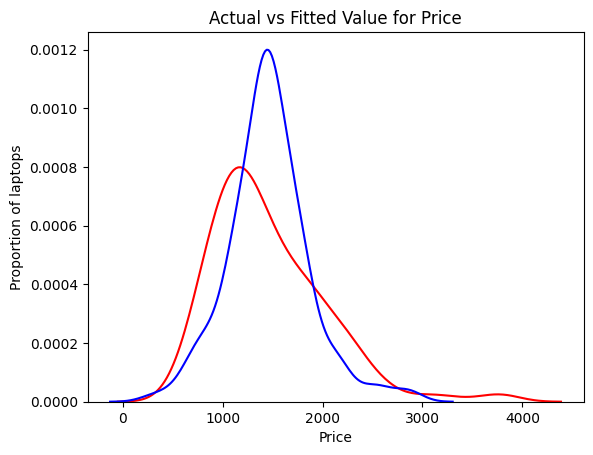

In [16]:
ax2 = sns.distplot(df['Price'], hist=False, color='r', label='Actual Value')
sns.distplot(Y_hat, hist=False, color='b', label='Fitted Values', ax=ax2)

plt.title('Actual vs Fitted Value for Price')
plt.xlabel('Price')
plt.ylabel('Proportion of laptops')

In [17]:
"""Task 3 - Polynomial Regression¶
Use the variable "CPU_frequency" to create Polynomial features. 
Try this for 3 different values of polynomial degrees. Remember that polynomial fits are done using numpy.polyfit."""

'Task 3 - Polynomial Regression¶\nUse the variable "CPU_frequency" to create Polynomial features. \nTry this for 3 different values of polynomial degrees. Remember that polynomial fits are done using numpy.polyfit.'

In [22]:
X = np.array(X).flatten()   # works whether X is Series or ndarray
Y = np.array(Y).ravel()     # makes Y 1-D

f1 = np.polyfit(X, Y, 1)
p1 = np.poly1d(f1)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)

In [23]:
"""Plot the regression output against the actual data points to note how the data fits in each case. 
To plot the polynomial response over the actual data points, you have the function shown below."""

'Plot the regression output against the actual data points to note how the data fits in each case. \nTo plot the polynomial response over the actual data points, you have the function shown below.'

In [24]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(independent_variable.min(),independent_variable.max(),100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title(f'Polynomial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of laptops')

In [25]:
"""Call this function for the 3 models created and get the required graphs."""

'Call this function for the 3 models created and get the required graphs.'

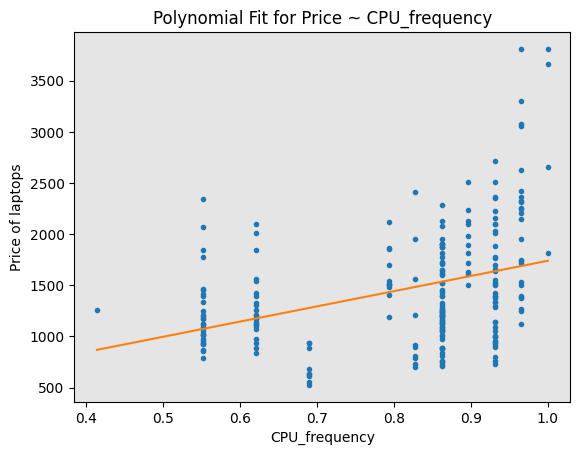

In [26]:
PlotPolly(p1, X, Y, 'CPU_frequency')

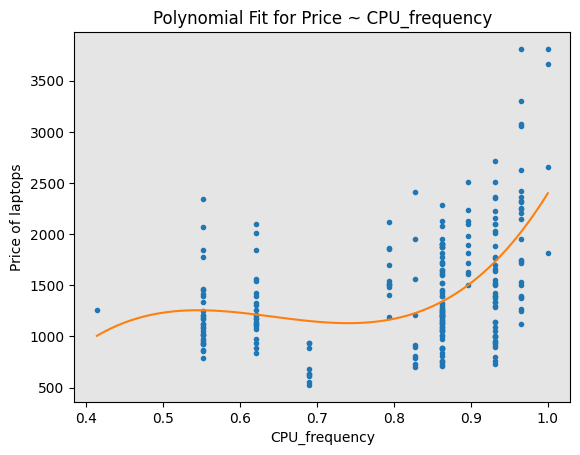

In [27]:
PlotPolly(p3, X, Y, 'CPU_frequency')

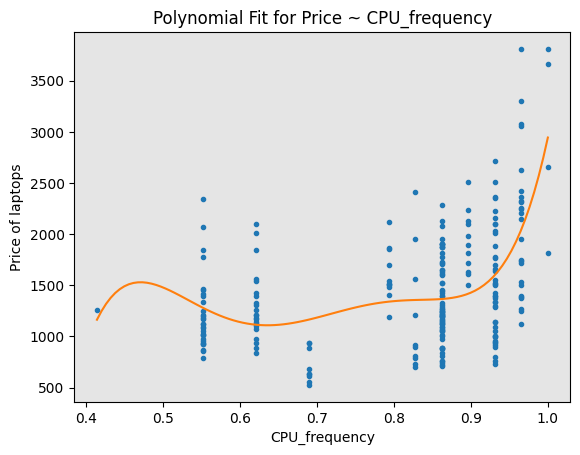

In [28]:
PlotPolly(p5, X, Y, 'CPU_frequency')

In [29]:
"""Also, calculate the R^2 and MSE values for these fits. 
For polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values."""

'Also, calculate the R^2 and MSE values for these fits. \nFor polynomial functions, the function sklearn.metrics.r2_score will be used to calculate R^2 values.'

In [30]:
r_squared_1 = r2_score(Y, p1(X))
print('R-Square 1st degree: ', r_squared_1)
print('MSE for 1st degree: ', mean_squared_error(Y, p1(X)))
r_squared_3 = r2_score(Y, p3(X))
print('R-Square 3st degree: ', r_squared_3)
print('MSE for 3st degree: ', mean_squared_error(Y, p3(X)))
r_squared_5 = r2_score(Y, p5(X))
print('R-Square 1st degree: ', r_squared_5)
print('MSE for 1st degree: ', mean_squared_error(Y, p5(X)))

R-Square 1st degree:  0.1344436321024326
MSE for 1st degree:  284583.4405868629
R-Square 3st degree:  0.2669264079653113
MSE for 3st degree:  241024.86303848765
R-Square 1st degree:  0.3030822706443915
MSE for 1st degree:  229137.29548053455


In [31]:
"""Task 4 - Pipeline
Create a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. 
Use the set of multiple features as before to create this pipeline."""

'Task 4 - Pipeline\nCreate a pipeline that performs parameter scaling, Polynomial Feature generation and Linear regression. \nUse the set of multiple features as before to create this pipeline.'

In [32]:
Input=[('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe = pipe.predict(Z)

In [33]:
"""Evaluate the MSE and R^2 values for the this predicted output."""

'Evaluate the MSE and R^2 values for the this predicted output.'

In [36]:
print('MSE: ', mean_squared_error(Y, ypipe))
print('R^2: ', r2_score(Y, ypipe))

MSE:  120595.86128028373
R^2:  0.6332094535859658
